# The Spark Foundation - Data Science And Business Analytics Inernship

# TASK 5: Exploratory Data Analysis - Sports

# author: Mona Verma

OBJECTIVE: 

● Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

● As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

● Suggest teams or players a company should endorse for its products.

● Dataset:https://bit.ly/34SRn3b

# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
import plotly.tools as tls
import ipywidgets as widgets
import warnings
warnings.filterwarnings("ignore")

# LOAD CSV IN NOTEBOOK

In [2]:
matches_data = pd.read_csv("matches.csv")
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
deliveries_data = pd.read_csv("deliveries.csv")
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# DATA INFORMATION

In [4]:
print(deliveries_data.columns)
print(matches_data.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')
Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')


In [5]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
matches_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [7]:
deliveries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [8]:
deliveries_data.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


# CLEANING AND TRANSFORMATION

In [9]:
matches_data.drop(['umpire3'],axis=1,inplace=True) 

In [10]:
deliveries_data.fillna(0,inplace=True)

In [11]:
matches_data.shape

(756, 17)

# BASIC DATA ANALYSIS

In [12]:
#Total season Played
matches_data['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [13]:
#Total Matches Played
matches_data.shape[0]

756

In [14]:
#all team
matches_data['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [15]:
#all  Venues Played At
print(matches_data['city'].nunique())
matches_data['city'].unique()

32


array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [16]:
#total umpire
print(matches_data['umpire1'].nunique())
matches_data['umpire1'].unique()

61


array(['AY Dandekar', 'A Nand Kishore', 'Nitin Menon', 'AK Chaudhary',
       nan, 'A Deshmukh', 'KN Ananthapadmanabhan', 'YC Barde', 'S Ravi',
       'CB Gaffaney', 'M Erasmus', 'NJ Llong', 'CK Nandan', 'Asad Rauf',
       'MR Benson', 'Aleem Dar', 'SJ Davis', 'BF Bowden', 'IL Howell',
       'DJ Harper', 'RE Koertzen', 'BR Doctrove', 'AV Jayaprakash',
       'BG Jerling', 'HDPK Dharmasena', 'S Asnani', 'GAV Baxter',
       'SS Hazare', 'K Hariharan', 'SL Shastri', 'SK Tarapore',
       'SJA Taufel', 'S Das', 'AM Saheba', 'PR Reiffel', 'JD Cloete',
       'VA Kulkarni', 'BNJ Oxenford', 'C Shamshuddin', 'RK Illingworth',
       'RM Deshpande', 'K Srinath', 'SD Fry', 'PG Pathak', 'K Bharatan',
       'Chris Gaffaney', 'Rod Tucker', 'Nigel Llong', 'Anil Chaudhary',
       'K Ananthapadmanabhan', 'O Nandan', 'A Nanda Kishore',
       'Vineet Kulkarni', 'Bruce Oxenford', 'Marais Erasmus',
       'Kumar Dharmasena', 'Anil Dandekar', 'Yeshwant Barde', 'Ian Gould',
       'Ulhas Gandhe', 'Nan

In [17]:
#Team won by Maximum Runs
print(matches_data.iloc[matches_data['win_by_runs'].idxmax()]['winner'])
print('Maximum Runs:'+ str(matches_data.iloc[matches_data['win_by_runs'].idxmax()]['win_by_runs']))

Mumbai Indians
Maximum Runs:146


In [18]:
#Team won by Maximum Wickets
print(matches_data.iloc[matches_data['win_by_wickets'].idxmax()]['winner'])
print('Maximum Wickets:'+ str(matches_data.iloc[matches_data['win_by_wickets'].idxmax()]['win_by_wickets']))

Kolkata Knight Riders
Maximum Wickets:10


In [19]:
#Team won by minimum runs
print(matches_data.iloc[matches_data[matches_data['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner'])
print('Minimum Runs:'+ str(matches_data.iloc[matches_data[matches_data['win_by_runs'].ge(1)].win_by_runs.idxmin()]['win_by_runs']))

Mumbai Indians
Minimum Runs:1


In [20]:
#Team won by Minimum Wickets
print(matches_data.iloc[matches_data[matches_data['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner'])
print('Minimum Wickets:'+ str(matches_data.iloc[matches_data[matches_data['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['win_by_wickets']))

Kolkata Knight Riders
Minimum Wickets:1


In [21]:
#has most man of the match awards
matches_data['player_of_match'].value_counts().idxmax()

'CH Gayle'

In [22]:
# has the highest number of match wins
matches_data['winner'].value_counts().idxmax()

'Mumbai Indians'

Observation :
1. Mumbai Indians is the team which won by maximum and minimum runs.
2. Kolkata Knight Riders is the team which won by maximum and minimum wickets.
3. CH Gayle has most man of the match awards.
4. Mumbai Indians has the highest number of match wins.

In [23]:
print('Winners By Years:')
for i in range(2008,2020):
    df=((matches_data[matches_data['season']==i]).iloc[-1]) 
    print(df[[1,10]].values)

Winners By Years:
[2008 'Rajasthan Royals']
[2009 'Deccan Chargers']
[2010 'Chennai Super Kings']
[2011 'Chennai Super Kings']
[2012 'Kolkata Knight Riders']
[2013 'Mumbai Indians']
[2014 'Kolkata Knight Riders']
[2015 'Mumbai Indians']
[2016 'Sunrisers Hyderabad']
[2017 'Mumbai Indians']
[2018 'Chennai Super Kings']
[2019 'Mumbai Indians']


Mumbai Indians is the team which won most matches in the History of IPL followed by Chennai Super Kings.

# EXPLORATERY DATA ANALYSIS

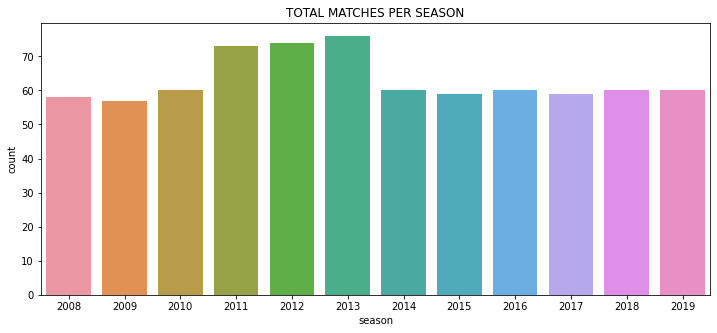

In [24]:
#Season Which had most number of matches
plt.figure(figsize=(12,5))
sns.countplot(x='season', data=matches_data)
plt.title("Total matches per season".upper())
plt.show()

In 2013, we have the most number of matches.

In [25]:
#most matches hosted venue 
figure = px.bar(matches_data, x=matches_data['venue'].value_counts().keys()[:],
             y=matches_data['venue'].value_counts()[:],
             color=matches_data['venue'].value_counts().keys()[:],
             labels={
                     'x': "Venue",
                     'y': "Total number of matches"
                     
                 })
figure.update_layout(title='Total number of matches played')
figure.show()

This shows EDEN GARDENS has hosted most matches in the History of IPL followed by M Chinnaswamy stadium.

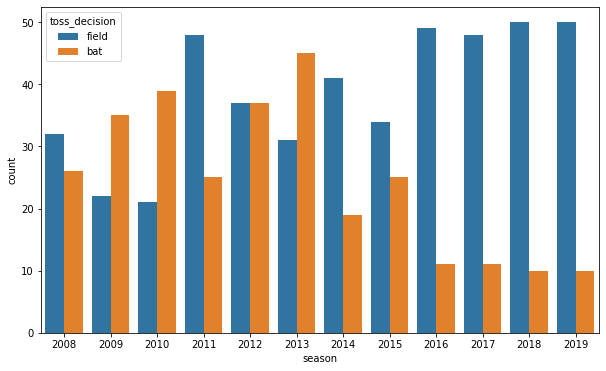

In [26]:
#Toss Decisions across Seasons
plt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches_data)
plt.show()

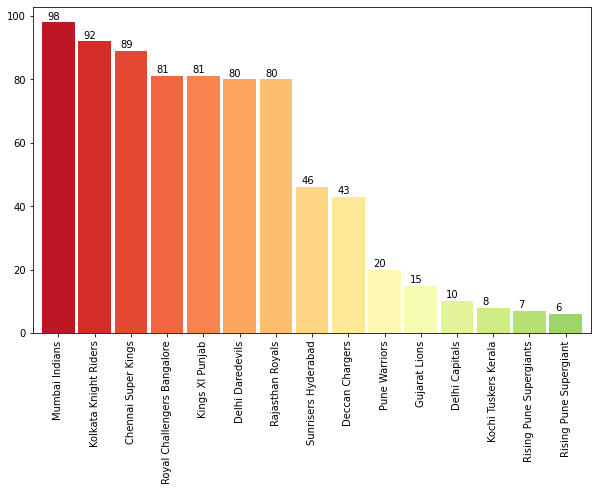

In [27]:
#toss winner
plt.subplots(figsize=(10,6))
ax=matches_data['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

Mumbai Indians is the team which won maximum toss while Rising Pune Supergiant won minimum toss.

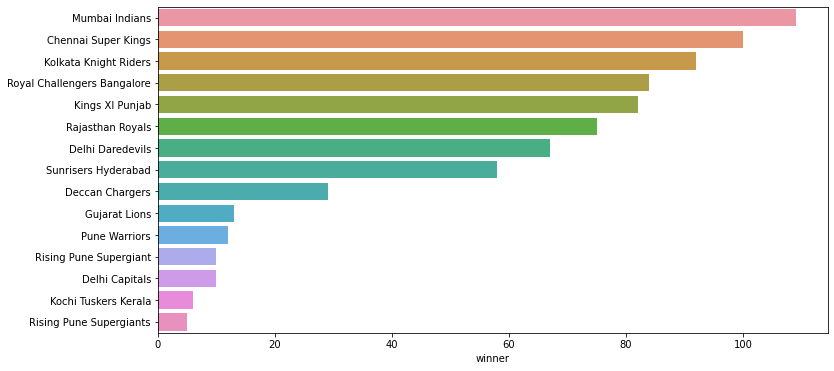

In [28]:
#most winning team
plt.figure(figsize=(12,6))
data = matches_data.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.show()

Mumbai Indians are the winners in most of the matches.

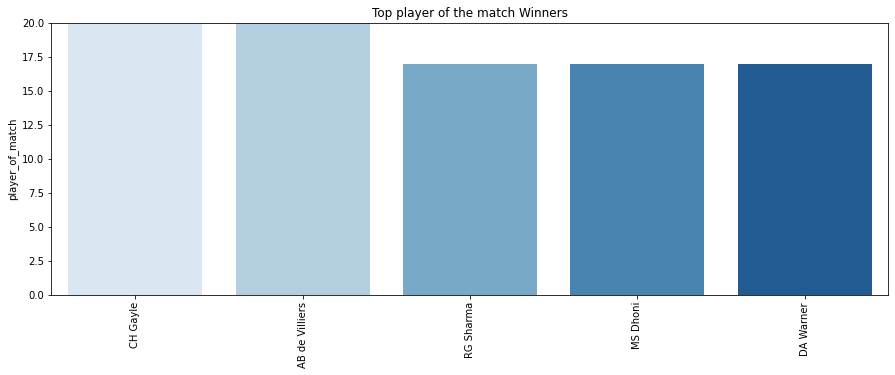

In [29]:
#top players
top_players = matches_data.player_of_match.value_counts()[:5]
fig, ax = plt.subplots(figsize=(15,5))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="Blues");
plt.show()

CH Gayle is the most Successful player in all match winners.

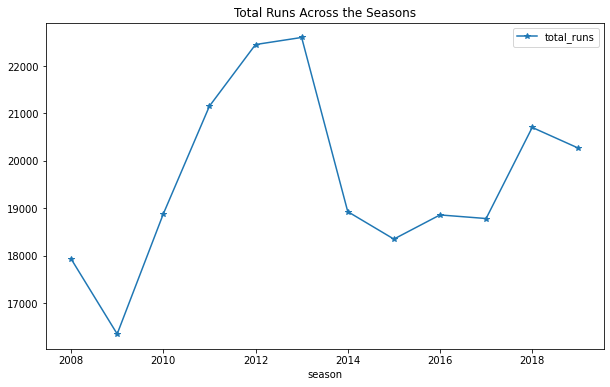

In [30]:
#Runs Across the Seasons
batsmen = matches_data[['id','season']].merge(deliveries_data, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='*')
plt.gcf().set_size_inches(10,6)
plt.title('Total Runs Across the Seasons')
plt.show()

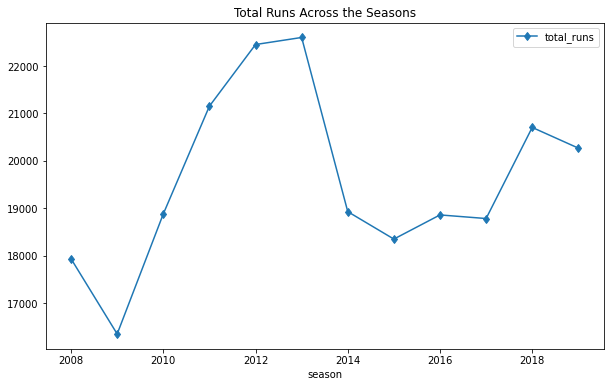

In [31]:
#Total Runs Across the Seasons
q = matches_data[['id','season']].merge(deliveries_data, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season=q.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='d')
plt.gcf().set_size_inches(10,6)
plt.title('Total Runs Across the Seasons')
plt.show()

In [32]:
matches_played_byteams=pd.concat([matches_data['team1'],matches_data['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=matches_data['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)

trace1 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['Total Matches'],
    name='Total Matches'
)
trace2 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['wins'],
    name='Matches Won'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

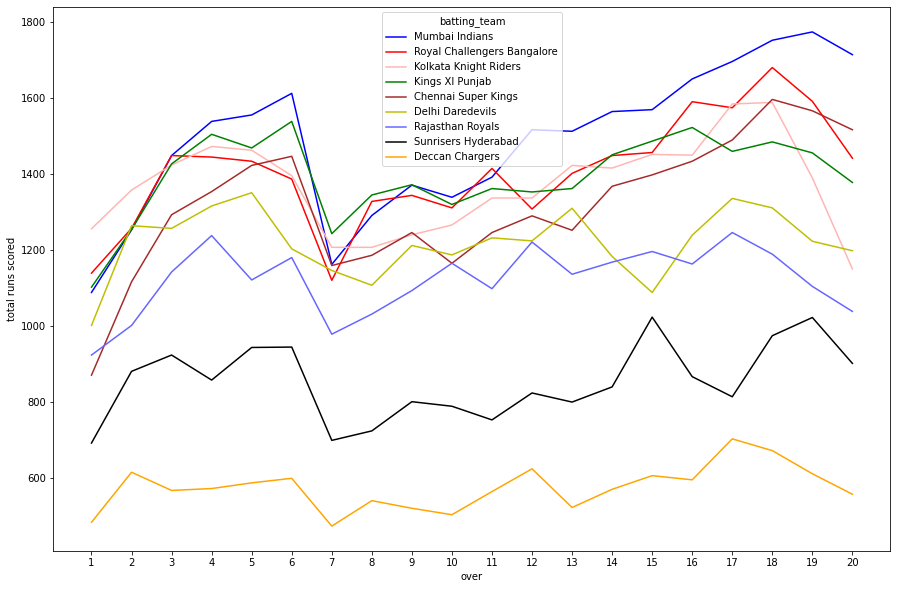

In [33]:
#Runs Per Over By Teams Across Seasons
runs_per_over = deliveries_data.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over[(matches_played_byteams[matches_played_byteams['Total Matches']>50].index)].plot(color=["b", "r", "#Ffb6b2", "g",'brown','y','#6666ff','black','#FFA500']) #plotting graphs for teams that have played more than 100 matches
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x)
plt.ylabel('total runs scored')
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

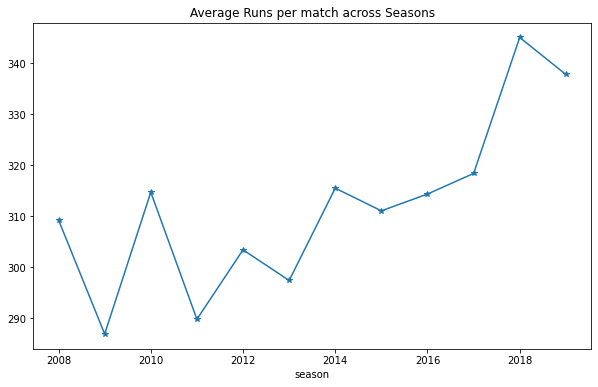

In [34]:
#Average runs per match in each Season
Average_each_season=matches_data.groupby(['season']).count().id.reset_index()
Average_each_season.rename(columns={'id':'matches'},inplace=1)
Average_each_season['total_runs']=season['total_runs']
Average_each_season['average_runs_per_match']=Average_each_season['total_runs']/Average_each_season['matches']
Average_each_season.set_index('season')['average_runs_per_match'].plot(marker='*')
plt.gcf().set_size_inches(10,6)
plt.title('Average Runs per match across Seasons')
plt.show()

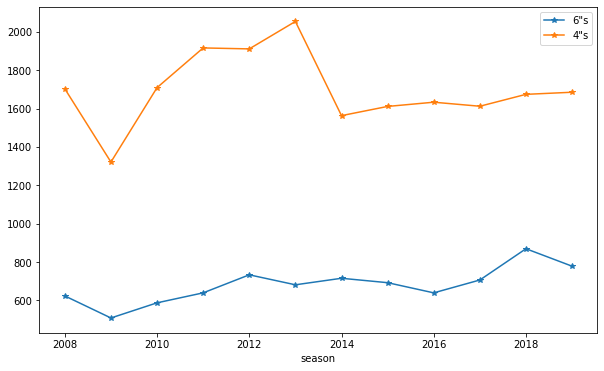

In [35]:
#'6"s' & '4"s'
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=q.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='*')
figure=plt.gcf()
figure.set_size_inches(10,6)
plt.show()

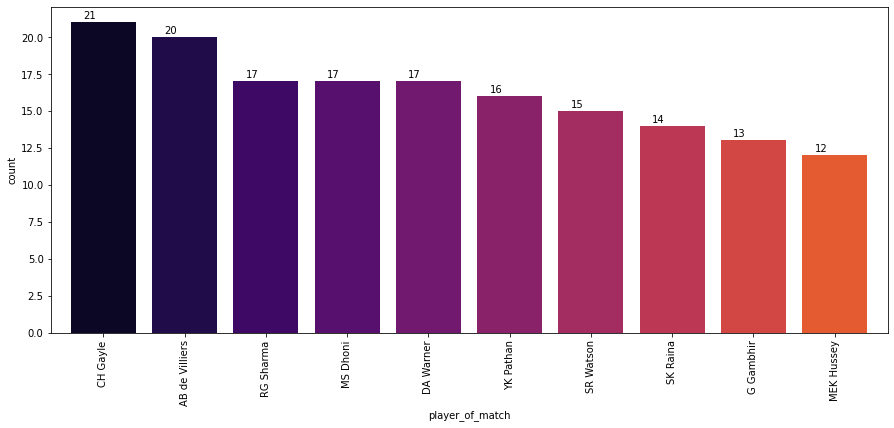

In [36]:
#Maximum Man Of Matches¶
plt.subplots(figsize=(15,6))
ax = matches_data['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',15))   
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

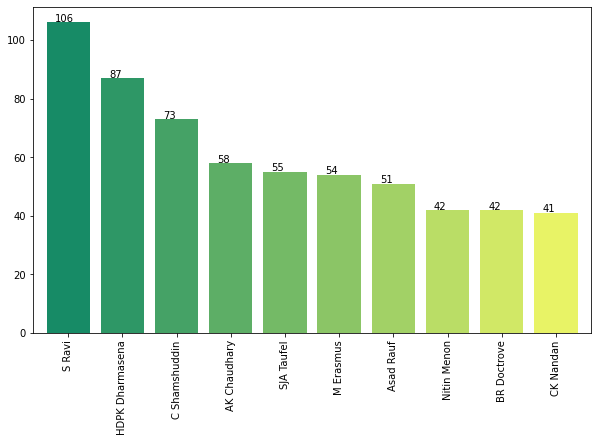

In [37]:
#FAVORITE UMPIRE
plt.subplots(figsize=(10,6))
umpire=pd.concat([matches_data['umpire1'],matches_data['umpire2']]) 
ax=umpire.value_counts().head(10).plot.bar(width=0.8,color=sns.color_palette('summer',10))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

# YEAR WISE ANALYSIS

In [38]:
def year_wise_analysis(season=2008):
    
    print("Is Toss Winner Also the Match Winner?")
    match=matches_data[matches_data['season']==season]
    df=match[matches_data['toss_winner']==matches_data['winner']]
    slices=[len(df),(matches_data[matches_data['season']==season].value_counts().count() +1-len(df))]# because Toal 59 matches were played in 2017
    labels=['yes','no']
    plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.2f%%',colors=['#99ff99','#23C26F'])
    plt.show()
    
    print("Desicion After Winning The Toss:")
    dfs=matches_data[(matches_data['toss_decision']=='field') & (matches_data['season']==season) ]
    labels=['Bat','Field']
    slices=[matches_data[matches_data['season']==season].value_counts().count() +1-len(dfs),len(dfs)]
    plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0.2,0.4),autopct='%1.2f%%',colors=['#70B0E0','#46B3F3'])
    plt.show()
    
    print("Observation:")
    dfd=match[(matches_data['toss_decision']=='field') & (matches_data['toss_winner']==matches_data['winner'])]
    labels=['Fielding First Side Won','Fielding Second Side Won']
    slices=[len(dfd),matches_data[matches_data['season']==season].value_counts().count()+1-len(dfd)]
    plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0.2,0.4),autopct='%1.2f%%',colors=['#FFBDED','#FE6DB6'])
    plt.show()

In [39]:
widgets.interact(year_wise_analysis,season = matches_data['season'].unique());

interactive(children=(Dropdown(description='season', index=1, options=(2017, 2008, 2009, 2010, 2011, 2012, 201…

# TEAM WISE ANALYSIS

In [40]:
def comparator(team1='Sunrisers Hyderabad'):
    teams=list(matches_data.team1.unique())
    teams.remove(team1)
    opponents=teams.copy()
    mt1=matches_data[((matches_data['team1']==team1)|(matches_data['team2']==team1))]
    for i in opponents:
        mask = (((mt1['team1']==i)|(mt1['team2']==i)))&((mt1['team1']==team1)|(mt1['team2']==team1))
        mt2 = mt1.loc[mask, 'winner'].value_counts().to_frame().T
        print(mt2)

In [41]:
widgets.interact(comparator,team1=matches_data['team1'].unique());

interactive(children=(Dropdown(description='team1', options=('Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat…

# team1_AND_team2

In [42]:
def team1_vs_team2(team1='Delhi Capitals',team2='Sunrisers Hyderabad'):
    mt1=matches_data[((matches_data['team1']==team1)|(matches_data['team2']==team1))&((matches_data['team1']==team2)|(matches_data['team2']==team2))]
    sns.countplot(x='season', hue='winner',data=mt1,palette='Set3')
    plt.xticks(rotation='vertical')
    leg = plt.legend( loc = 'upper center')
    fig=plt.gcf()
    fig.set_size_inches(10,6)
    plt.show()

In [43]:
widgets.interact(team1_vs_team2,team1=matches_data['team1'].unique(),team2=matches_data['team2'].unique());

interactive(children=(Dropdown(description='team1', index=14, options=('Sunrisers Hyderabad', 'Mumbai Indians'…

In [44]:
#Score Distribution For Teams by Innings
def score_team_innings(innings=1):
    plt.subplots(figsize=(12,6))
    xyz=deliveries_data.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
    xyz.drop('match_id',axis=1,inplace=True)
    xyz=xyz.sort_values(by=['batting_team','total_runs'],ascending=True)
    score_inning=xyz[xyz['inning']==innings]
    sns.boxplot(x='total_runs',y='batting_team',data=score_inning).set_title('Innings {0}'.format(innings))
    plt.show()
    
    fig=plt.gcf()
    fig.set_size_inches(12,6)

In [45]:
radio = widgets.RadioButtons(options = [1,2],value=1)
widgets.interact(score_team_innings,innings = radio);

interactive(children=(RadioButtons(description='innings', options=(1, 2), value=1), Output()), _dom_classes=('…

In [46]:
#Batsman Comparator
balls=deliveries_data.groupby(['batsman'])['ball'].count().reset_index()
runs=deliveries_data.groupby(['batsman'])['batsman_runs'].sum().reset_index()
balls=balls.merge(runs,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball':'ball_x','batsman_runs':'ball_y'},axis=1,inplace=True)
sixes=deliveries_data.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours=deliveries_data.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
balls['strike_rate']=balls['ball_y']/balls['ball_x']*100
balls=balls.merge(sixes,left_on='batsman',right_on='batsman',how='outer')
balls=balls.merge(fours,left_on='batsman',right_on='batsman',how='outer')
compare=deliveries_data.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
compare=compare.groupby(['batsman','batting_team'])['batsman_runs'].max().reset_index()
balls=balls.merge(compare,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball_x':'balls','ball_y':'runs','batsman_runs_x':"6's",'batsman_runs_y':"4's",'batting_team':'Team','batsman_runs':'Highest_score'},axis=1,inplace=True)
balls

,batsman,balls,runs,strike_rate,6's,4's,Team,Highest_score
0,A Ashish Reddy,196,280,142.857143,16,15,Deccan Chargers,10
1,A Ashish Reddy,196,280,142.857143,16,15,Sunrisers Hyderabad,36
2,A Chandila,7,4,57.142857,0,0,Rajasthan Royals,4
3,A Chopra,75,53,70.666667,7,0,Kolkata Knight Riders,24
4,A Choudhary,20,25,125.000000,1,1,Royal Challengers Bangalore,15
...,...,...,...,...,...,...,...,...
930,Yuvraj Singh,2207,2765,125.283190,218,149,Royal Challengers Bangalore,83
931,Yuvraj Singh,2207,2765,125.283190,218,149,Sunrisers Hyderabad,70
932,Z Khan,141,117,82.978723,11,2,Delhi Daredevils,4
933,Z Khan,141,117,82.978723,11,2,Mumbai Indians,23


In [47]:
def batsman_comparator(batsman1="Gayle",batsman2="Villiers"):
    stat1="6's"
    stat2="4's"
    sns.FacetGrid(balls,hue='Team',size=8).map(plt.scatter, stat1,stat2, alpha=0.5).add_legend()
    bats1=balls[balls['batsman'].str.contains(batsman1)].sort_values(by=stat1,ascending=False)
    bats2=balls[balls['batsman'].str.contains(batsman2)].sort_values(by=stat1,ascending=False)
    plt.scatter(bats1[stat1],bats1[stat2]-1,s=75,c='#55ff33')
    plt.text(x=bats1[stat1].values[0],y=bats1[stat2].values[0],s=batsman1,
            fontsize=10, weight='bold', color='#f46d43')
    plt.scatter(bats2[stat1],bats2[stat2],s=75,c='#f73545')
    plt.text(x=bats2[stat1].values[0],y=bats2[stat2].values[0]+1,s=batsman2, 
            fontsize=10, weight='bold', color='#ff58fd')
    plt.gcf().set_size_inches(15,10)
    plt.title('Batsman Comparator',size=25)
    plt.show()

#batsman_comparator("6's","4's",'Gayle','Villiers')
widgets.interact(batsman_comparator,batsman1=deliveries_data['batsman'].unique(),batsman2=deliveries_data['batsman'].unique());

interactive(children=(Dropdown(description='batsman1', options=('DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvr…

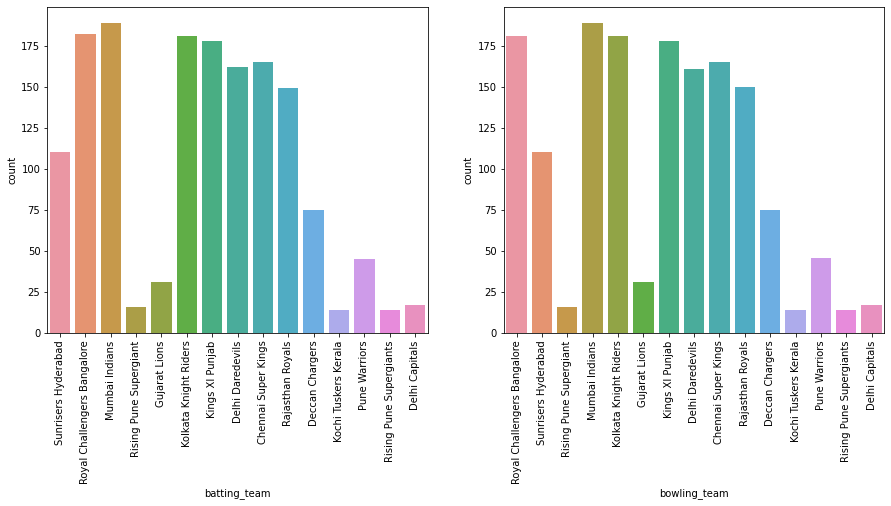

In [48]:
high_scores=deliveries_data.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
fig, ax =plt.subplots(1,2)
chart_1 = sns.countplot(high_scores['batting_team'],ax=ax[0])
chart_1.set_xticklabels(chart_1.get_xticklabels(), rotation=90)
chart_2=sns.countplot(high_scores['bowling_team'],ax=ax[1])
chart_2.set_xticklabels(chart_2.get_xticklabels(), rotation=90)
fig=plt.gcf()
fig.set_size_inches(15,6)
plt.show()

Mumbai Indians is the team show powerful batting as well as bowling.

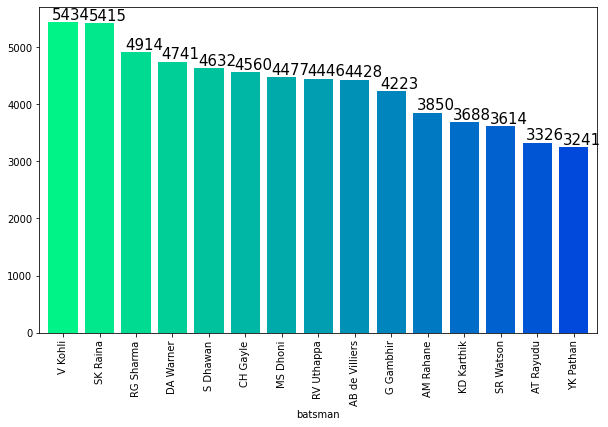

In [49]:
#Top Batsman
plt.subplots(figsize=(10,6))
max_runs=deliveries_data.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:15].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
plt.show()


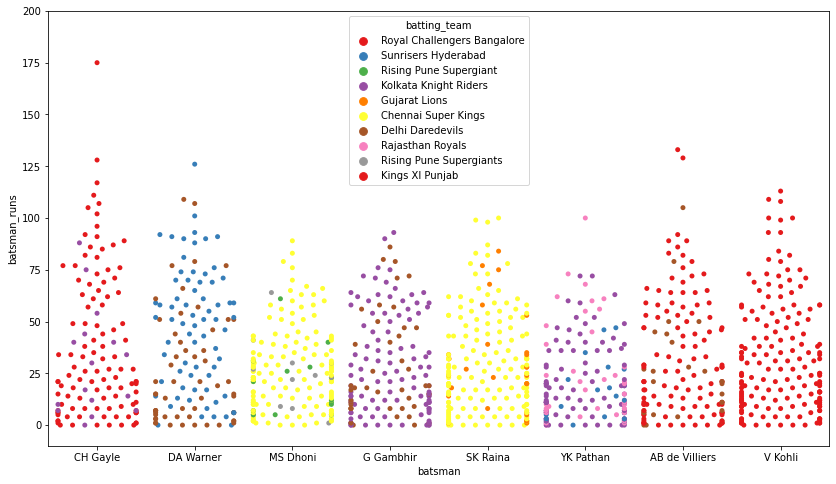

In [50]:
#Individual Scores By Top Batsman each Inning
top_scores = deliveries_data.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
swarm=['CH Gayle','V Kohli','G Gambhir','SK Raina','YK Pathan','MS Dhoni','AB de Villiers','DA Warner']
scores = deliveries_data.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
scores=scores[top_scores['batsman'].isin(swarm)]
sns.swarmplot(x='batsman',y='batsman_runs',data=scores,hue='batting_team',palette='Set1')
fig=plt.gcf()
fig.set_size_inches(14,8)
plt.ylim(-10,200)
plt.show()


Observations:

Chris Gayle has the highest Individual Score of 175 and Highest Number of Centuries i.e 5
MS Dhoni and Gautam Gambhir have never scored a Century.
V Kohli has played only for 1 IPL Team in all seasons i.e RCB

In [51]:
a=batsmen.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
b=max_runs.sort_values(ascending=False)[:10].reset_index()
c=b.merge(a,left_on='batsman',right_on='batsman',how='left')
c.drop('batsman_runs_x',axis=1,inplace=True)
c.set_index('batsman',inplace=True)
c.columns=['type','count']
c=c[(c['type']==1)|(c['type']==2)|(c['type']==4)|(c['type']==6)]
cols=['type','count']
c.reset_index(inplace=True)
c=c.pivot('batsman','type','count')

trace1 = go.Bar(
    y=c.index, x=c[6],
    name="6's",
    orientation = 'h',
    marker = dict(color = 'rgba(178, 78, 139, 0.6)',
        line = dict(color = 'rgba(178, 78, 139, 1.0)',
            width = 3)
    )
)
trace2 = go.Bar(
    y=c.index, x=c[4],
    name="4's",
    orientation = 'h',
    marker = dict(color = 'rgba(58, 71, 80, 0.6)',
        line = dict(color = 'rgba(58, 71, 80, 1.0)',
            width = 3)
    )
)

trace3 = go.Bar(
    y=c.index, x=c[2],
    name="2's",
    orientation = 'h',
    marker = dict(color = 'rgba(101, 178, 139, 0.6)',
                  line = dict(color = 'rgba(101, 178, 139, 1.0)',
            width = 3)
    )
)
trace4 = go.Bar(
    y=c.index, x=c[1],
    name="1's",
    orientation = 'h',
    marker = dict(color = 'rgba(208, 105, 80, 0.6)',
        line = dict(color = 'rgba(208, 105, 80, 1.0)',
            width = 3)
    )
)

data = [trace1, trace2,trace3,trace4]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='stacked-bar')


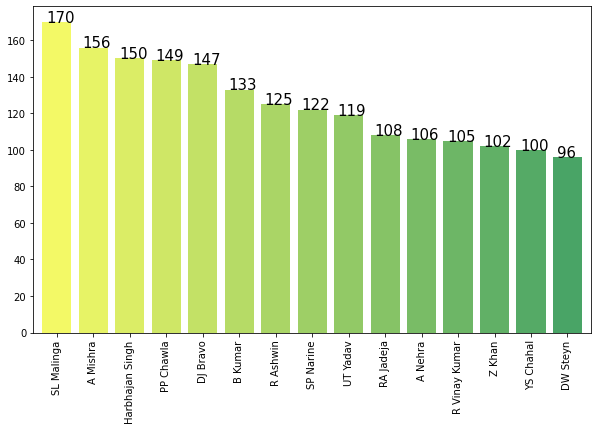

In [52]:
#Highest Wicket Bowler
plt.subplots(figsize=(10,6))
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  
ct=deliveries_data[deliveries_data["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:15].plot.bar(width=0.8,color=sns.color_palette('summer_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()),fontsize=15)
plt.show()

In [53]:
#Teams with maximum Boundaries (INTERACTIVE)
ax=deliveries_data[deliveries_data['batsman_runs']==6].batting_team.value_counts().reset_index()
ax2=deliveries_data[deliveries_data['batsman_runs']==4].batting_team.value_counts().reset_index()
ax=ax.merge(ax2,left_on='index',right_on='index',how='left')
ax.rename({'index':'team','batting_team_x':"6's",'batting_team_y':"4's"},axis=1,inplace=True)

trace1 = go.Bar(
    x=ax.team.values, y=ax["6's"],
    name="6's",
    orientation = 'v',
    marker = dict(color = 'rgba(204,12,28, 0.6)',
        line = dict(color = 'rgba(204,12,28, 0.6)',
            width = 3)
    )
)
trace2 = go.Bar(
    x=ax.team.values, y=ax["4's"],
    name="4's",
    orientation = 'v',
    marker = dict(color = 'rgba(9,234,227, 0.6)',
        line = dict(color = 'rgba(9, 227, 227, 1.0)',
            width = 3)
    )
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='marker-h-bar')


In [54]:
bowlers=deliveries_data.groupby('bowler').sum().reset_index()
bowl=deliveries_data['bowler'].value_counts().reset_index()
bowlers=bowlers.merge(bowl,left_on='bowler',right_on='index',how='left')
bowlers=bowlers[['bowler_x','total_runs','bowler_y']]
bowlers.rename({'bowler_x':'bowler','total_runs':'runs_given','bowler_y':'balls'},axis=1,inplace=True)
bowlers['overs']=(bowlers['balls']//6)
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  
ct=deliveries_data[deliveries_data["dismissal_kind"].isin(dismissal_kinds)]
ct=ct['bowler'].value_counts()[:20].reset_index()
bowlers=bowlers.merge(ct,left_on='bowler',right_on='index',how='left').dropna()
bowlers=bowlers[['bowler_x','runs_given','overs','bowler_y']]
bowlers.rename({'bowler_x':'bowler','bowler_y':'wickets'},axis=1,inplace=True)
bowlers.head()

,bowler,runs_given,overs,wickets
7,A Mishra,3850,528,156.0
9,A Nehra,2537,329,106.0
53,B Kumar,3264,451,133.0
93,DJ Bravo,3733,451,147.0
108,DW Steyn,2454,367,96.0


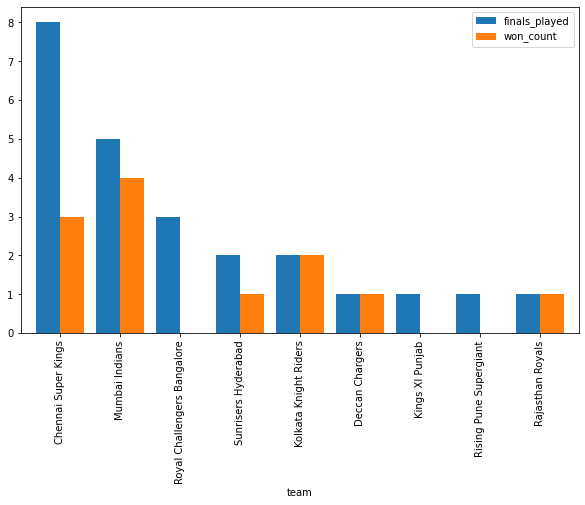

In [55]:
#final match
finals=matches_data.drop_duplicates(subset=['season'],keep='last')
finals=finals[['id','season','city','team1','team2','toss_winner','toss_decision','winner']]
most_finals=pd.concat([finals['team1'],finals['team2']]).value_counts().reset_index()
most_finals.rename({'index':'team',0:'count'},axis=1,inplace=True)
xyz=finals['winner'].value_counts().reset_index()
most_finals=most_finals.merge(xyz,left_on='team',right_on='index',how='outer')
most_finals=most_finals.replace(np.NaN,0)
most_finals.drop('index',axis=1,inplace=True)
most_finals.set_index('team',inplace=True)
most_finals.rename({'count':'finals_played','winner':'won_count'},inplace=True,axis=1)
most_finals.plot.bar(width=0.8)
plt.gcf().set_size_inches(10,6)
plt.show()

Chennai Super Kings  has played 6 IPL finals but could win only 2 IPL matches
followed by Mumbai Indians has played 5 IPL finals and won 4 IPL matches.